# Initial visualization of temperature trends between stations

#### The purpose of this notebook is to briefly investigate temperature trends between stations to guide the lapse rate analysis. For example, initial plots not shown here reveal that hourly temperature data yields lapse rate plots that are far too noisy to be meaningful. Indeed, other studies (e.g. Minder et al., 2010) often use daily, monthly, seasonally, or annual averaged lapse rates depending on the specific research need. My examination here will start with daily tmax and tmin plots and work towards longer timescales depending on the nature of the data.

In [2]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from matplotlib.lines import Line2D
# set up
pd.plotting.register_matplotlib_converters()
plt.style.use('ggplot')

# data folder
data = '/Users/admin/Desktop/GIP-2020/Kennicott/DATA/'
figure_folder = '/Users/admin/Desktop/GIP-2020/Kennicott/PRODUCTS/Python_Figures'
format_data = '/Users/admin/Desktop/GIP-2020/Kennicott/PROJECT/FormattedData'

#%%
# --- Load Data
meta = pd.read_pickle(os.path.join(format_data,'temperature_meta.pickle'))
dd = pd.read_pickle(os.path.join(format_data,'daily_temperature_data.pickle'))
# dd has tmin, tavg, tmax for gates, may, buri, usgs, coop

### Next, plot daily TAVG data for all five stations


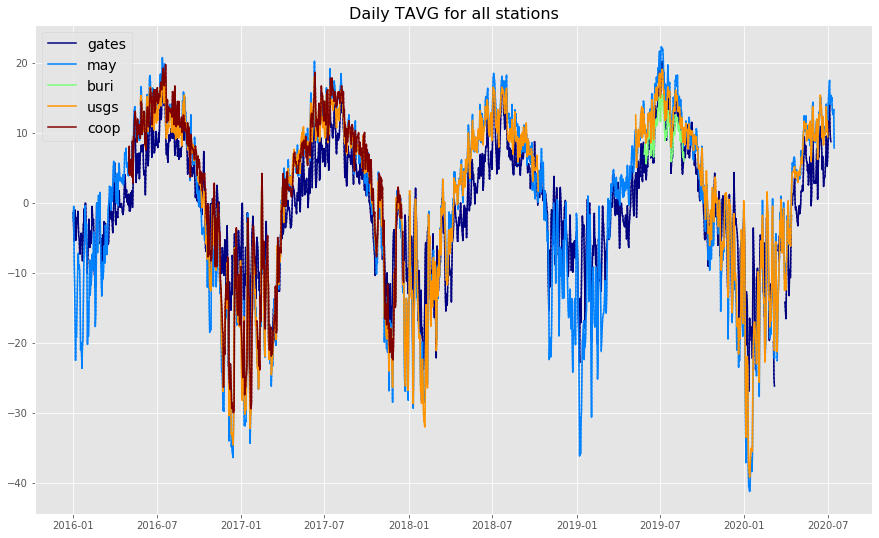

In [2]:

# 1.  Stacked daily plot
fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('Daily TAVG for all stations', fontsize=16)
# iterators
keys = ['gates','may','buri','usgs','coop']
colors = [cm.jet(x) for x in np.linspace(0,1,5)]

for key,c in zip(keys,colors):
    ax.plot(dd[key].TAVG,label=key,color=c)
    ax.plot(dd[key].TAVG,color=c,linestyle='dotted')
ax.legend(fontsize=14)
plt.show()

#### These records also appear rather noise to visually parse out any crude relationships. Next, we can examine bi-weekly and monthly average 

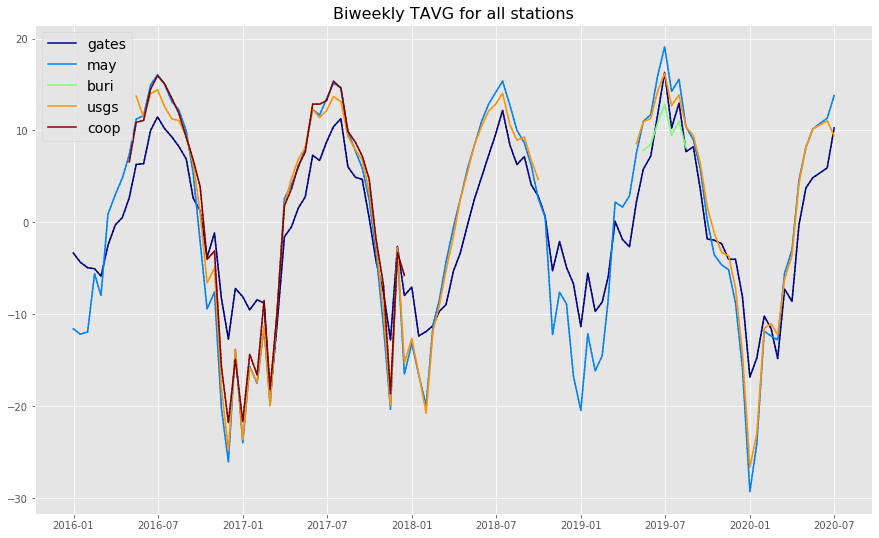

In [3]:
# 2.  Bi-weekly averaged temperature plot
# resample to bi-weekly averages that are closed to the right: i.e. values for 1-15th of month are labelled as 15th.
bw = dd.resample('SM').mean() 
# plot figure
fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('Biweekly TAVG for all stations', fontsize=16)
# iterators
keys = ['gates','may','buri','usgs','coop']
colors = [cm.jet(x) for x in np.linspace(0,1,5)]

for key,c in zip(keys,colors):
    ax.plot(bw[key].TAVG,label=key,color=c)
    ax.plot(bw[key].TAVG,color=c,linestyle='dotted')
ax.legend(fontsize=14)
plt.show()

### From this plot, we can start to discern a consistent offset in summer 2-week averaged temperatures between the Gates Glacier station and the lower elevation stations (May Creek, USGS, NWS Coop). It appears that this temperature offset switches in winter however, as Gates Glacier temperatures appear consistently warmer than the lower elevation temperatures. Interestingly, the Buri AWS installed on the lower Kennicott features cooler summertime temperatures than the higher-elevation Gates Glacier station. 

### We can next visually inspect biweekly averaged TMAX and TMIN for comparable trends. 


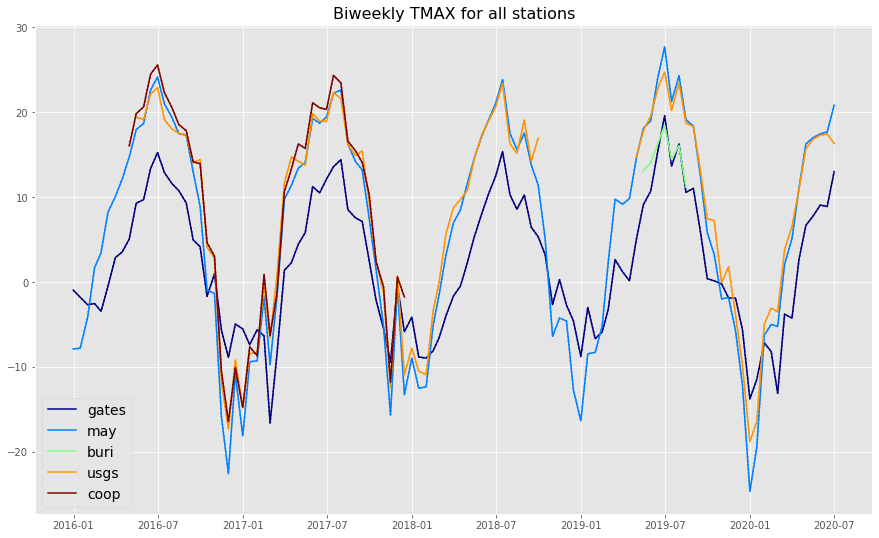

In [4]:
# 2. TMAX, TMIN for Bi-weekly average temperatures
# plot figure
fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('Biweekly TMAX for all stations', fontsize=16)
# iterators
keys = ['gates','may','buri','usgs','coop']
colors = [cm.jet(x) for x in np.linspace(0,1,5)]

for key,c in zip(keys,colors):
    ax.plot(bw[key].TMAX,label=key,color=c)
    ax.plot(bw[key].TMAX,color=c,linestyle='dotted')
ax.legend(fontsize=14)
plt.show()

### Here we see a similar temperature offset between stations as we saw with TAVG, but even more pronouned during summertime temperatures. The consistent temperature offset suggests that for maximum daily temperatures during summer months, the daytime lapse rate on the Kennicott Glacier should be fairly constant. 

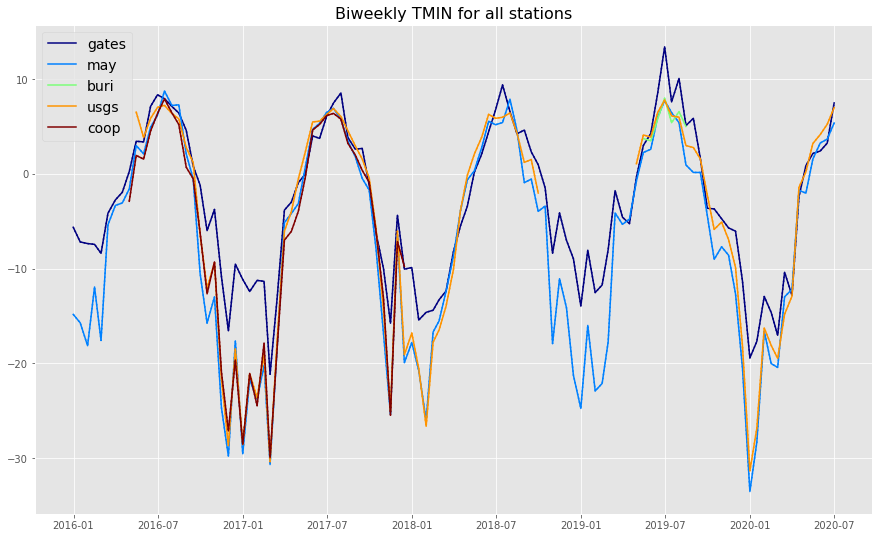

In [5]:
# 2. TMIN for Bi-weekly average temperatures
# plot figure
fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('Biweekly TMIN for all stations', fontsize=16)
# iterators
keys = ['gates','may','buri','usgs','coop']
colors = [cm.jet(x) for x in np.linspace(0,1,5)]

for key,c in zip(keys,colors):
    ax.plot(bw[key].TMIN,label=key,color=c)
    ax.plot(bw[key].TMIN,color=c,linestyle='dotted')
ax.legend(fontsize=14)
plt.show()

### This plot of bi-weekly TMIN shows a different story than the TMAX. The temperature offset is minimal between stations during summertime, and in some cases the Gates Glacier averaged TMIN temperatures are higher than the lower elevation stations. This suggests that the nighttime lapse rates during summer are temporally consistent but of opposite sign to the daytime lapse rates. Indeed, TMIN values at Gates Glacier are much higher than other stations during the winter months, indicating a strongly positive lapse rate (temperatures rise with elevation). 

In [ ]:
### Next, we can examine monthly and seasonal temperature trends between stations.

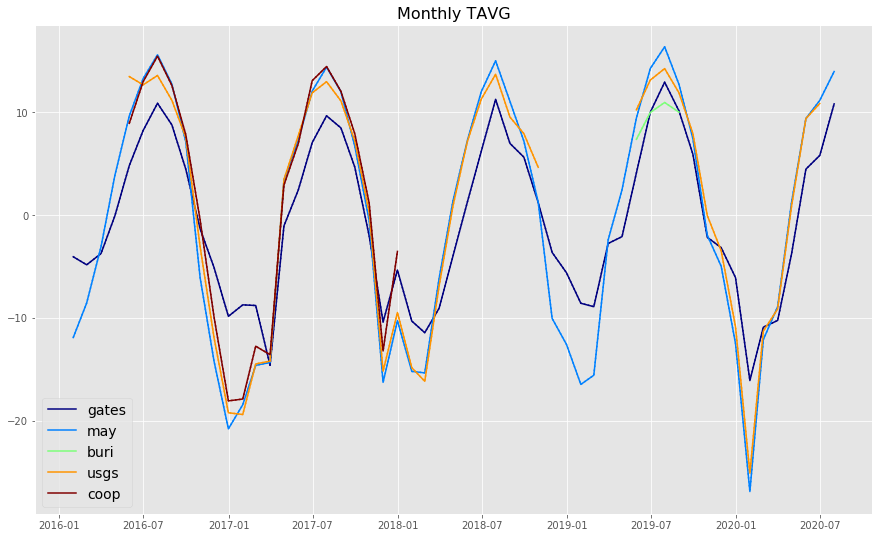

In [7]:
# 3. Monthly TAVG
mm = dd.resample('M').mean()
# plot figure
fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('Monthly TAVG', fontsize=16)
# iterators
keys = ['gates','may','buri','usgs','coop']
colors = [cm.jet(x) for x in np.linspace(0,1,5)]

for key,c in zip(keys,colors):
    ax.plot(mm[key].TAVG,label=key,color=c)
    ax.plot(mm[key].TAVG,color=c,linestyle='dotted')
ax.legend(fontsize=14)
plt.show()

### Similarly, here with monthly TAVG data we see consistent temperature offsets between stations during summers and winters, where the lower elevation stations are on average warmer than Gates during the summer AND the winter, with inflection points at the shoulder seasons. Finding out the timing of these inflection points may be important for the glacier stake data. 

### Next, we can examine seasonal plots of temperature, where summer is defined by the period from April 1 - September 30 and winter is all other months.

In [3]:
#--- Seasonal plotting

# resample to different intervals
td = dd.resample('3D').mean() # three day averages
ww = dd.resample('W').mean() # weekly, closed to right (end of week)
bw = dd.resample('SM').mean() # semi-monthly
mm = dd.resample('M').mean() # monthly

# construct new custom AK summer index
def AK_ix(df):
    """ constructs new index for alaska summer that goes from
    May 1 to September 30. """
    
    seasons = {'summer': [4,5,6,7,8,9], # May - September
               'winter': [1,2,3,10,11,12]}
    months = {num:sea for sea in seasons.keys()
                            for num in seasons[sea]}
    # name winter according to year which it starts
    sea = pd.Series(df.index.month).map(months)+' ' + df.index.year.astype(str)
    # move winter years back
    for date,lab,i in zip(df.index.get_level_values(0),sea,np.arange(len(sea))):
        if date.month < 4: # subtract one from year..
            new = lab.split()[0]+ ' ' + str(int(lab.split()[1])-1)
            sea.iloc[i] = new
    # put back into dataframe
    seaidx = pd.Index(sea,name='SEASON')
    df = df.set_index(seaidx,append=True)
    
    return df

In [4]:
def summer_plots(df):
    """ Plotting function for different temperature resampling intervals."""
    # slice into summers 
    years = ['2016','2017','2018','2019','2020']
    for year in years:
        
        key = 'summer '+ year
        # subset out one season of data
        summer = df.xs(key=key,level='SEASON').unstack().unstack(level=1)
        
        # reshape and rename for plotting
        summer.index.set_names(['SITE','DATE'],inplace=True)
        
        # plot all variables
        fig,axs = plt.subplots(1,3,sharey=True,figsize=(14,8))
        fig.suptitle(key,fontsize=18)
        fig.subplots_adjust(top=0.88)
        
        vars = ['TMIN','TMAX','TAVG']
        plt.xticks(rotation='horizontal')
        for var,ax in zip(vars,axs.flatten()):
            summer.reset_index().pivot(index='DATE',columns='SITE',values=var).plot(
                ax=ax,title=var,linewidth=3)
            #ax.xaxis.set_major_locator(mdates.MonthLocator())
            #ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) # just put month abbr
            ax.set_xlabel('')
            
        # common labels
        fig.add_subplot(111, frame_on=False)
        plt.tick_params(labelcolor="none", bottom=False, left=False)
        plt.ylabel('Temperature (C)',fontsize=16)
        plt.show()


### For example, the following is three-day averaged temperature indices for the five summers of data. 

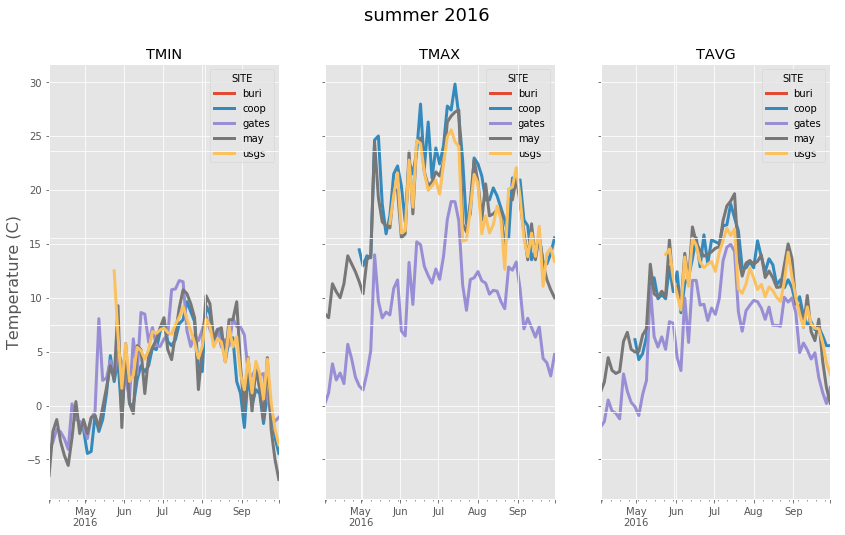

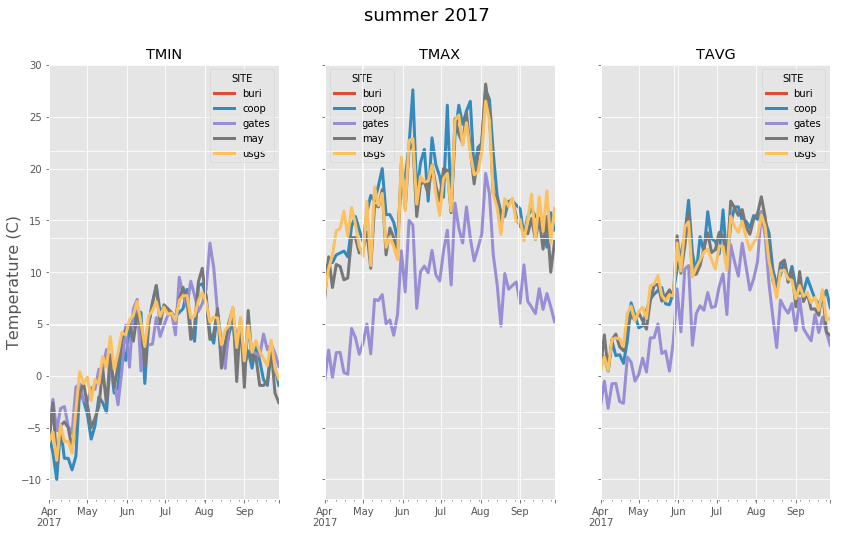

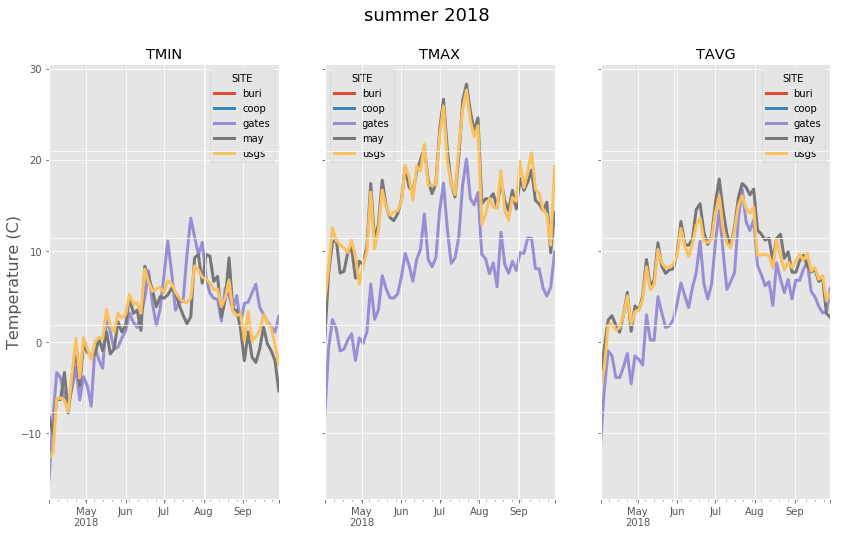

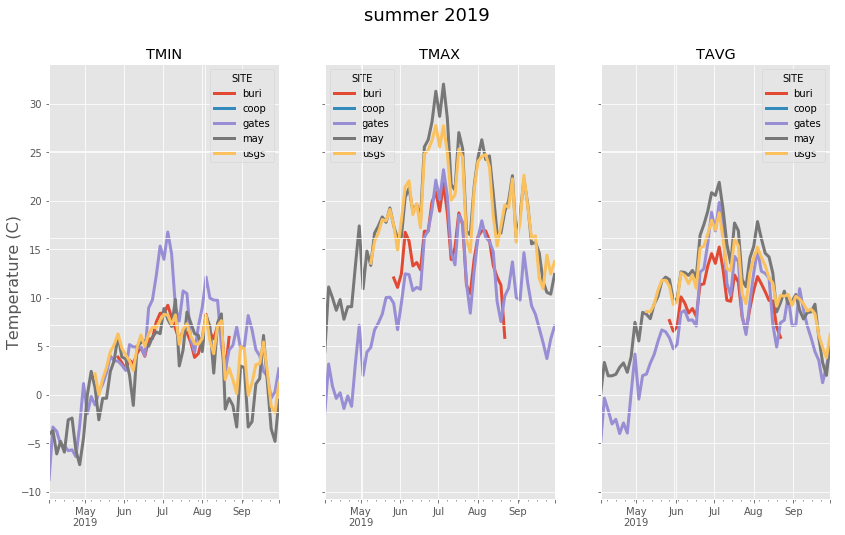

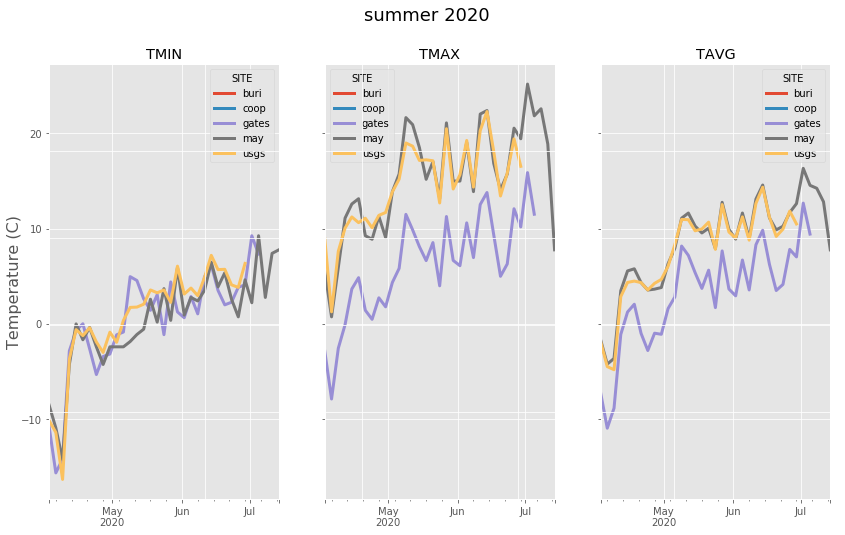

In [5]:
# --- Plot 3-day averaged temperature records
# put in index column
td = AK_ix(td)
# plot
summer_plots(td)

### From these plots, it appears that TMAX values during summer appear highly correlated across all stations during the whole summer interval. TAVG differences between stations appears to diminish in early April and in late September, perhaps bordering the wintertime flip in lapse rates. TMIN values exhibit minimal differences between stations during summer months. 

### Weekly-averaged temperature records show similar patterns:

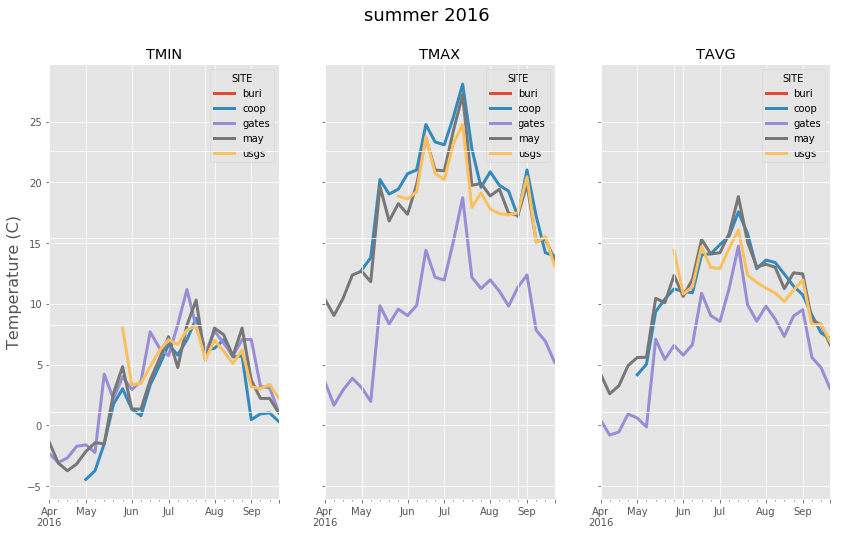

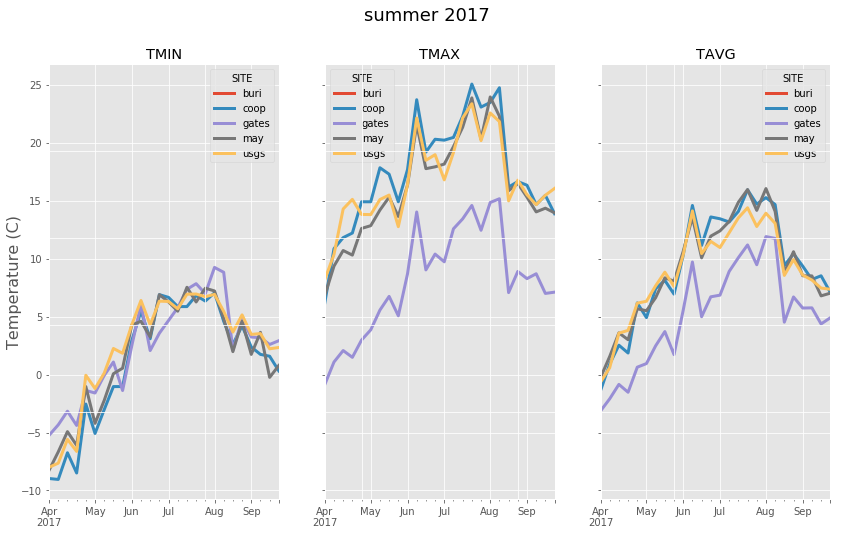

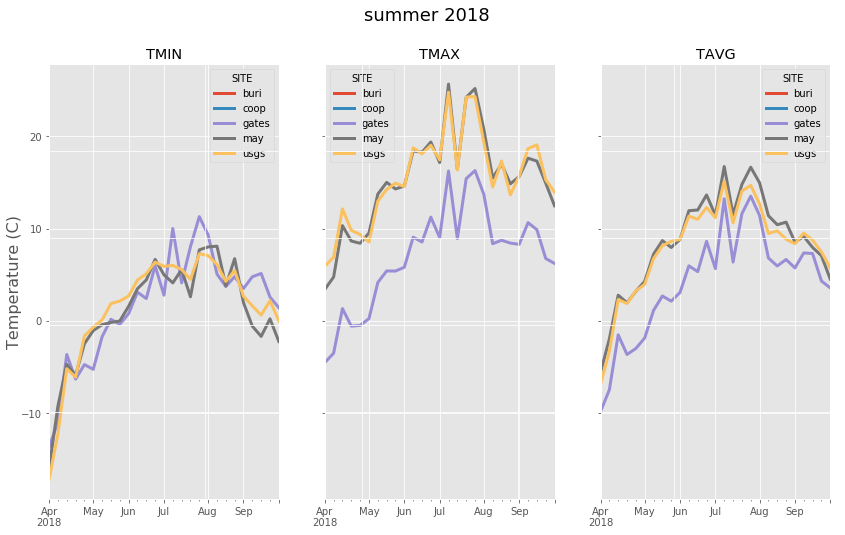

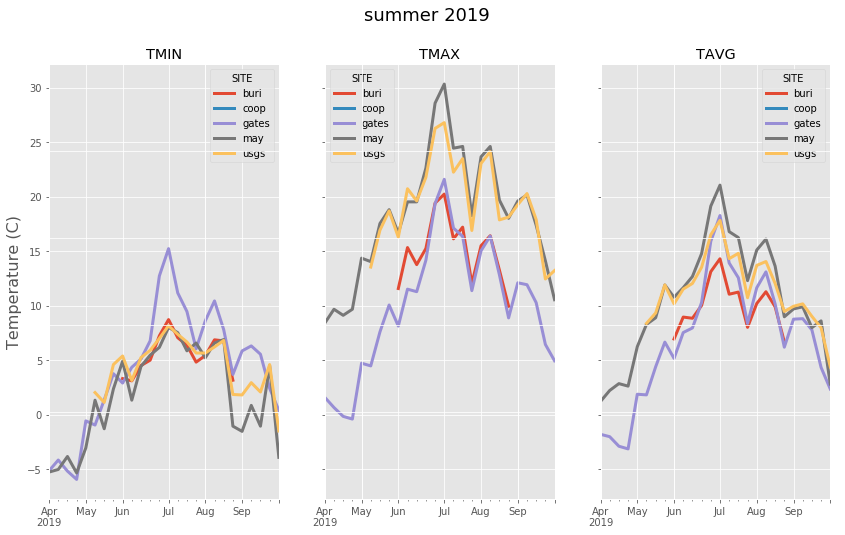

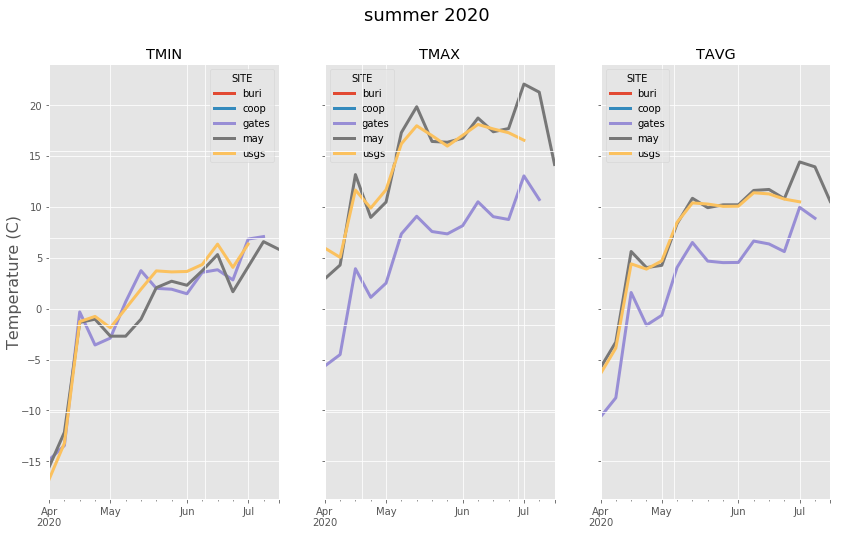

In [8]:
# --- Plot weekly averaged temperature records
# put in index column
ww = AK_ix(ww)
# plot
summer_plots(ww)

### From these intial investigations, several questions arise:

### 1. Which temperature variable should we utilize for the lapse rate? 

#### If daily TMIN values depict nightly temperatures, then it follows that nighttime lapse rates are much different from daytime lapse rates. If we are really only interested in daytime temperatures for ablation stakes temperature extrapolations and for degree day modeling, perhaps we should only be concerned with TMAX lapse rates. 

### 2. What do seasonally-averaged temperature records look like? Are the corresponding lapse rates consistent throughout the summer?
